Group 1 - (8,4)
Group 2 - (18,10)
Group 3 - (12,20)
Group 4 - (2,14)

use same probability distribution and create a total of 4000 points but use a std of 2. use 1000 points for training and 1000 for testing


0.008


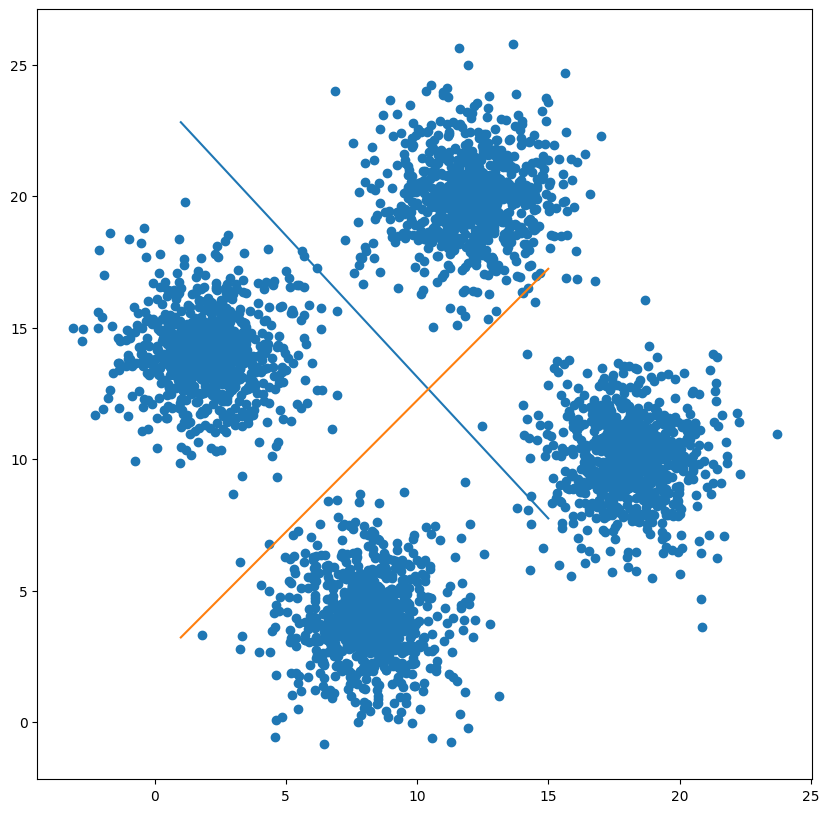

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt

N=1000;  M=1000; # total number of points for each cluster and 1000 points for training
p=[2, 14, 12, 20, 8, 4, 18, 10]

x=np.zeros((4*N,2))         # pre-allocate for the input and the
t=np.zeros((4*N,2))         # target vector.

r=np.random.normal(0,2,4*N); # use a standard deviation of 2
the=2*np.pi*np.random.rand(4*N);


x[0:N,0]=p[0] + r[0:N]*np.cos(the[0:N])
x[0:N,1]=p[1] + r[0:N]*np.sin(the[0:N])
t[0:N,0]=0
t[0:N,1]=1

x[N:2*N,0]=p[2] + r[N:2*N]*np.cos(the[N:2*N])
x[N:2*N,1]=p[3] + r[N:2*N]*np.sin(the[N:2*N])
t[N:2*N,0]=1
t[N:2*N,1]=1

x[2*N:3*N,0]=p[4] + r[2*N:3*N]*np.cos(the[2*N:3*N])
x[2*N:3*N,1]=p[5] + r[2*N:3*N]*np.sin(the[2*N:3*N])
t[2*N:3*N,0]=0
t[2*N:3*N,1]=0

x[3*N:4*N,0]=p[6] + r[3*N:4*N]*np.cos(the[3*N:4*N])
x[3*N:4*N,1]=p[7] + r[3*N:4*N]*np.sin(the[3*N:4*N])
t[3*N:4*N,0]=1
t[3*N:4*N,1]=0


plt.figure(figsize=(10,10))
plt.scatter(x[:,0], x[:,1])


w11=0.5-np.random.rand()   # parameter intialization.
w12=0.5-np.random.rand()
b1=0.5-np.random.rand()
w21=0.5-np.random.rand()   # parameter intialization.
w22=0.5-np.random.rand()
b2=0.5-np.random.rand()


a=range(0,4*N)

sp=random.sample(a,M+1000);    # indeces for random selection of data fo
                              #  training and testing.
###################### Trainig #########################################

for i in range(0,M):
    y1 = b1 + w11*x[sp[i],0] + w12*x[sp[i],1]
    if y1<0:
        y1=0
    else:
        y1=1

    e = t[sp[i],0] - y1

    w11 = w11 + e*x[sp[i],0];  w12 = w12 + e*x[sp[i],1]
    b1 = b1 + e

for i in range(0,M):
    y2 = b2 + w21*x[sp[i],0] + w22*x[sp[i],1]
    if y2<0:
        y2=0
    else:
        y2=1

    e = t[sp[i],1] - y2
    w21 = w21 + e*x[sp[i],0];  w22 = w22 + e*x[sp[i],1]
    b2 = b2 + e


er=0
for i in range(M,M+1000):
    y1 = b1 + w11*x[sp[i],0] + w12*x[sp[i],1]
    if y1<0:
        y1=0
    else:
        y1=1

    e1 = abs(t[sp[i],0] - y1)

    y2 = b2 + w21*x[sp[i],0] + w22*x[sp[i],1]
    if y2<0:
        y2=0
    else:
        y2=1

    e2 = abs(t[sp[i],1] - y2)

    if (e1==1 or e2==1):
        er=er+1

er=er/1000

print(er)

ii=np.linspace(1,15,15)
plt.plot(ii,  (-b1-w11*ii)/w12)
plt.plot(ii,  (-b1-w21*ii)/w22)